In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# 単純パーセプトロンクラス
class Perceptron(object):
    
    # パーセプトロンのコンストラクタ
    # 　eta:学習率
    # 　n_iter:トレーニング回数
    # 　random_state:乱数のシード
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # トレーニングさせる関数
    # 　X:特徴量の配列
    # 　y:正解データの配列
    def fit(self, X, y):
        # rgen = np.random.RandomState(int)
        # 　乱数を生成する関数
        # 　rgen.randn(10):標準正規分布の乱数を10個返す
        # 　rgen.rand(10):一様分布の乱数を10個返す、その他色々な関数がある
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # トレーニング回数分（n_iter）だけ計算する
        for _ in range(self.n_iter):
            errors = 0
            # zip関数：pythonのfor文の際に用いる関数
            for xi, target in zip(X, y):
                # 予測値（predict(xi)）と正解データ（target）との差に学習率（eta）を掛け、更新後の重みを計算する
                update = self.eta * (target - self.predict(xi))
                # 重みwi（各変数xiの係数）の更新
                # 配列の中のセミコロンはインデックスの開始と終了を指す（w[1:5]なら、インデックスの1から5つの配列で計算するという意味）
                self.w_[1:] += update * xi
                # 重みw0（変数w0の係数＝単縦パーセプトロンの切片）の更新
                self.w_[0] += update
                # 分類が誤っていた予測値の数をカウントする
                errors += int(update != 0.0)
            # 各トレーニングのエラーの回数を記録する
            self.errors_.append(errors)
        
        # トレーニング済みのインスタンスを返す
        return self

    # 総入力（z=wTx）を計算する関数
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 分類の予測値を返す
    # 総入力が正の数の場合は1と分類し、負の数の場合は-1と分類する
    # numpy.where(条件, trueの場合の値, falseの場合の値)
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [30]:
# csvデータの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


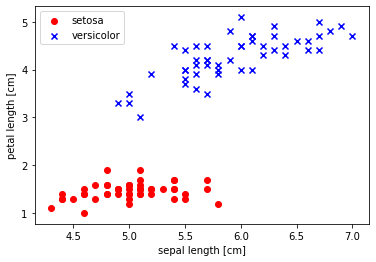

In [31]:
# 0番目から99番目までの100個のデータの目的関数（正解データ）を取得する
y = df.iloc[:100, 4].values

# 目的関数の値を1と-1に変換する
y = np.where(y == 'Iris-setosa', -1, 1)

# 0番目から99番目までの100個のデータの1列目と3列目の特徴量を取得する
X = df.iloc[0:100, [0, 2]].values

# データのプロット
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

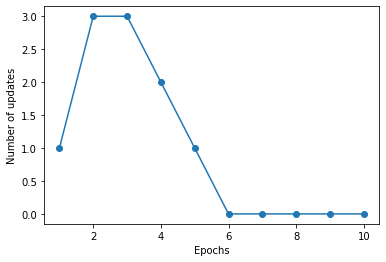

In [32]:
# パーセプトロンクラスのインスタンスを生成
ppn = Perceptron(eta=0.01, n_iter=10)

# 読み込んだcsvデータを用いて、生成したパーセプトロンクラスのインスタンスを学習する
ppn.fit(X, y)

# 計算ステップ毎のエラー個数をプロットする
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [33]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # プロットするアイテムを定義
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # プロット領域を定義
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # 予測値を計算する値をメッシュで取得
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # メッシュで定義した値を用いて予測する
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # reshape:numpyの関数、配列を行列に変換する
    Z = Z.reshape(xx1.shape)
    
    # 画面にプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

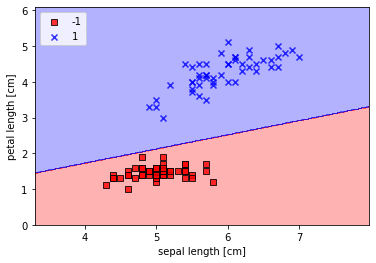

In [34]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [35]:
# 単層ニューラルネットワーク（ADALINE）
# 重みの更新を閾値関数ではなく誤差によって行う
# コスト関数は誤差平方和を用いる
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 活性化関数（activation）で計算
            output = self.activation(net_input)
            # 誤差を計算
            errors = (y - output)
            # wiの重みを更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            # w0の重みを更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数（誤差平方和）の計算
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    # 総入力を計算
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 活性化関数（恒等関数）
    def activation(self, X):
        return X

    # 値の予測
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

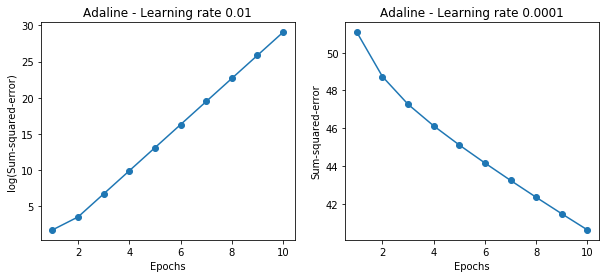

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ADALINEで学習（学習率ηが大きすぎて誤差が増大している）
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# ADALINEで学習（学習率ηが小さすぎて誤差が全然小さくならない）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [37]:
# 学習データのコピー
X_std = np.copy(X)

# 入力データの標準化
# X.mean：与えられた配列の平均値を算出する
# X.std：与えられた配列の標準偏差を算出する
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

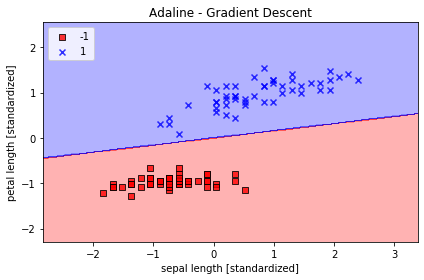

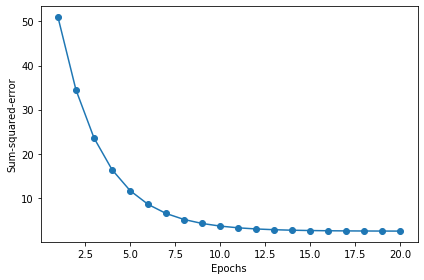

In [38]:
ada = AdalineGD(n_iter=20, eta=0.01)
# 標準化されたデータを用いてADALINEを学習させる
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

In [39]:
# 確率的勾配降下法に基づいたADALINE
class AdalineSGD(object):
    
    # shuffle：確率的勾配降下法では、トレーニングデータをシャッフルする必要がある
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        # 重みの初期値を設定
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                # トレーニングデータをシャッフルする
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                # 各トレーニングデータに対する重みの更新
                # バッチ勾配降下法と異なり、各トレーニングデータ毎に全ての重みを更新する
                cost.append(self._update_weights(xi, target))
            # 誤差の平均を計算
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    # 重みの初期化を行わずにトレーニングデータを学習する
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # 目的関数の要素数が2以上の場合は各サンプルの特徴量と目的関数で重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的関数の要素数が1の場合はサンプル全体の特徴量と目的関数で重みを更新
        else:
            self._update_weights(X, y)
        return self

    # 配列の要素をシャッフルする
    def _shuffle(self, X, y):
        # 配列の要素数分だけ乱数を生成する
        r = self.rgen.permutation(len(y))
        # シャッフルした配列を返す
        return X[r], y[r]
    
    # 重みの初期値を設定する
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    # 重みを更新する
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        # バッチ勾配降下法と異なり、各トレーニングデータ毎に全ての重みを更新する
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    # 総入力を計算
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 活性化関数（恒等関数）
    def activation(self, X):
        return X

    # 予測
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

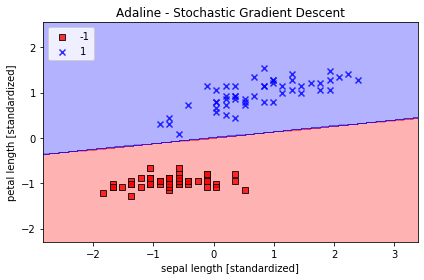

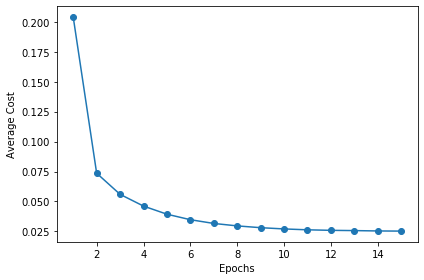

In [40]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [41]:
ada.partial_fit(X_std[0, :], y[0])